In [1]:
from numpy import*
from matplotlib.pyplot import*
from vpython import*
import random as random

<IPython.core.display.Javascript object>

## Problema 1

In [2]:
coord = zeros(10)
N = 1000000
I = 0

for q in range(N):
    s = 0
    for i in range(10):
        coord[i] = random.random()
        s = (coord[i])**2 + s
        
    if s <= 1:
        f = 1
    else:
        f = 0
      
    I = f*1024/N + I
    
I

2.4084479999999875

## Problema 2

In [3]:
#b)
N = 1000000
# a integral de w(x)dx é igual a 2, considerando a = 0 e b=1, e w(x) = x^(-0.5)

def f(x):
    return (x**(-1/2))/(exp(x)+1)
def w(x):
    return x**(-0.5)
I = 0
for i in range(N):
    x = (random.random())**2
    I = (f(x)/w(x))*(2/N) + I
    
I

0.8389827671116732

## Problema 3

In [4]:
cont, n = 0, 20
grade = zeros([n,n])
for j in range(n):
    for i in range(n):
        if random.random() < 0.5 and cont <= (n*n)/2:
            grade[i][j] = 1
        else:
            grade[i][j] = -1

In [5]:
#a)
def fE(j):
    global grade
    temp1, temp2 = 0, 0
    temp1 = -j*grade[:-1,:]*grade[1:,:] + temp1
    temp2 = -j*grade[:,:-1]*grade[:,1:] + temp2
        
    E = sum(temp1) + sum(temp2)
    return E

In [ ]:
#b) e c)
step = 250000
M, Energy = [], []
J = 1
for i in range(step):
    E1 = fE(J)
    x = random.randrange(0, 20)
    y = random.randrange(0, 20)
    grade[x][y] = -grade[x][y]
    E2 = fE(J)
    dE = E2 - E1
    
    if dE > 0:
        if random.random() > exp(-dE):
            grade[x][y] = -grade[x][y]
    Energy.append(fE(J))
    M.append(sum(grade))

In [ ]:
figure(figsize = (8,5))
plot(M)
figure(figsize=(8,5))
plot(Energy)


# d) é possível ver que o gráfico desce ou sobe, 
#porém ele sempre estabiliza e isso se da porque queremos que ele va para um estado com menos energia, 
#e como estamos simulando o dipolo de um material ferromagnético, onde a energia é menor quando os dipolos estão alinhados, 
#ou seja, os dipolos vão se alinhando e assim o gráfico estabiliza.

In [15]:
#e)
T = 1
cont, n = 0, 20
canvas(title = 'Extra', width = 500, height = 500,background = color.white)
par = []
grade = zeros([n,n])

for j in range(n):
    linha = []
    for i in range(n):
        if random.random() < 0.5 and cont <= (n*n)/2:
            linha.append(sphere(pos = vector(i, j, 0),radius=0.5, color = color.blue)) #as bolas azuis representam o spin +1
            grade[i][j] = 1
        else:
            linha.append(sphere(pos = vector(i, j, 0),radius=0.5, color = color.red)) #as bolas vermelhas representam o spin -1
            grade[i][j] = -1
    par.append(linha)

step = 100000
J, T = 1, 1
M, Energy = [], []

for i in range(step):
    rate(100)
    E1 = fE(J)
    
    x = random.randrange(0,20)
    y = random.randrange(0,20)
    
    grade[x][y] = -grade[x][y]
    E2 = fE(J)
    dE = E2 - E1

    if dE > 0:
        if random.random() > exp(-dE/T):
            grade[x][y] = -grade[x][y]
        
    if grade[x][y] == 1:
        par[x][y].color = color.blue
        
    if grade[x][y] == -1:
        par[x][y].color = color.red
        
    Energy.append(fE(J))
    M.append(sum(grade))


# É possível notar que quanto maior a temperatura mais tempo demora para se estabilizar, 
#isso ocorre porque quanto maior for a temperatura mais agitadas ficam as moléculas e assim ficando mais instável.

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

## Problema 4

In [11]:
#a)
Tmax = 10
Tmin = 1e-6
tau = 1e4

def fdelta():
    
    mi = 1
    z = random.random()
    theta = random.random()*2*pi
    r = mi*sqrt(-2*log(1-z))
    
    return r*cos(theta)

def fa(x):
    return x**2 - cos(4*pi*x)

-0.00019843517654383191


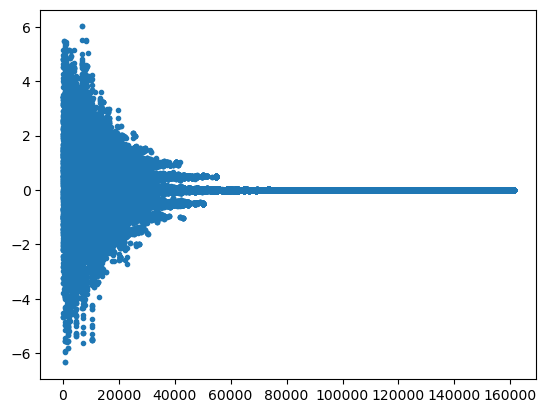

In [12]:
xlist = []
t, x = 0, 2
T = Tmax
while T > Tmin:
    t += 1
    T = Tmax*exp(-t/tau)
    
    f0 = fa(x)
    delta =  fdelta()
    x = x + delta
    df = fa(x) - f0
    
    if df>0:
        if random.random() > exp(-df/T):
            x = x - delta
            
    xlist.append(x)
    
plot(xlist, '.')
print(x)

In [13]:
#b)
Tmax = 10
Tmin = 1e-6
tau = 1e4

def fb(x):
    return cos(x) + cos(x*sqrt(2)) + cos(x*sqrt(3))

34.1467234523505


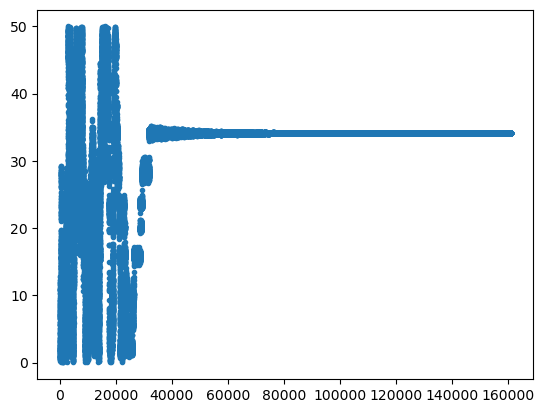

In [14]:
xlist = []
t, x = 0, 0
T = Tmax
while T > Tmin:
    t += 1
    T = Tmax*exp(-t/tau)
    
    f0 = fb(x)
    delta =  fdelta()
    
    while (x+delta)> 50 or (x+delta) < 0:
        delta = fdelta()
        
    x = x + delta
    df = fb(x) - f0 
    
    if df>0:
        if random.random() > exp(-df/T):
            x = x - delta
            
    xlist.append(x)
    
plot(xlist, '.')
print(x)